## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/valid'


In [7]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [9]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [11]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [13]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [17]:

# view the structure of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 111, 111, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 111, 111, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 109, 109, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 109, 109, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 109, 109, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 109, 109, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 109, 109, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 109, 109, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 54, 54, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 54, 54, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 54, 54, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 52, 52, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 22,314,794 (85.12 MB)

 Trainable params: 512,010 (1.95 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [19]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [21]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [25]:
test_set = test_datagen.flow_from_directory('Datasets/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [27]:
# Custom generator to skip missing files
def safe_generator(generator):
    while True:
        try:
            data = next(generator)
            yield data
        except FileNotFoundError as e:
            print(f"Skipping missing file: {e}")
            continue

# Wrap the training_set in the safe generator
safe_training_set = safe_generator(training_set)

# Fit the model with the safe generator
r = model.fit(
    safe_training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 904ms/step - accuracy: 0.5821 - loss: 4.3978

C:\Users\lokes\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


574/574 ━━━━━━━━━━━━━━━━━━━━ 630s 1s/step - accuracy: 0.5823 - loss: 4.3953 - val_accuracy: 0.7468 - val_loss: 2.6834
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 422s 736ms/step - accuracy: 0.7829 - loss: 2.2152
Epoch 3/10


C:\Users\lokes\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


574/574 ━━━━━━━━━━━━━━━━━━━━ 486s 847ms/step - accuracy: 0.8286 - loss: 1.8077 - val_accuracy: 0.7963 - val_loss: 2.2904
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 892s 2s/step - accuracy: 0.8415 - loss: 1.8006
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1084s 2s/step - accuracy: 0.8525 - loss: 1.9648 - val_accuracy: 0.8061 - val_loss: 2.7907
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 726s 1s/step - accuracy: 0.8612 - loss: 1.8066
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 870s 2s/step - accuracy: 0.8742 - loss: 1.7118 - val_accuracy: 0.8303 - val_loss: 2.8021
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 732s 1s/step - accuracy: 0.8770 - loss: 1.7973
Epoch 9/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 605s 1s/step - accuracy: 0.8917 - loss: 1.5080 - val_accuracy: 0.8683 - val_loss: 2.0818
Epoch 10/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 509s 888ms/step - accuracy: 0.8951 - loss: 1.6126


In [29]:
import matplotlib.pyplot as plt

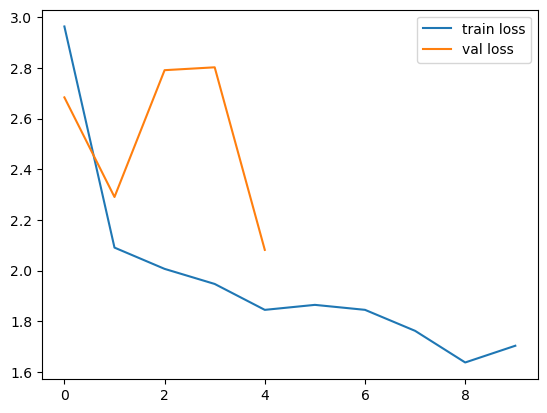

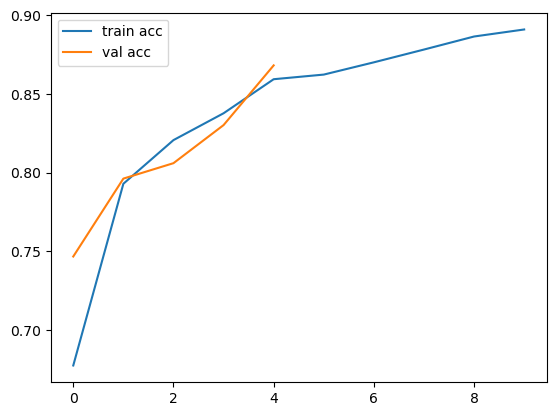

<Figure size 640x480 with 0 Axes>

In [31]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [36]:

y_pred = model.predict(test_set)


144/144 ━━━━━━━━━━━━━━━━━━━━ 98s 658ms/step


In [40]:
y_pred

array([[1.0000000e+00, 4.0879904e-17, 2.0573576e-26, ..., 0.0000000e+00,
        0.0000000e+00, 1.9972462e-29],
       [0.0000000e+00, 2.1705298e-30, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.2967373e-19],
       [0.0000000e+00, 6.8845736e-30, 0.0000000e+00, ..., 0.0000000e+00,
        7.2039390e-16, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.3883447e-33, ..., 0.0000000e+00,
        1.0671636e-27, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [42]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [44]:
y_pred

array([0, 5, 3, ..., 9, 1, 7], dtype=int64)

In [47]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [53]:
model=load_model('model_resnet50.h5')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'model_resnet50.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
img_data

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
import os
print(os.path.exists('Datasets/New Plant Diseases Dataset(Augmented)/train\\Tomato___Spider_mites Two-spotted_spider_mite\\2db25538-8655-4530-95e8-025d428e158c___Com.G_SpM_FL 9522_flipTB.JPG'))
print(os.path.exists('archive (4)/New Plant Diseases Dataset(Augmented)/valid'))